In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

In [2]:
class NeuralNetworkWithBias:

  def __init__(self, input_nodes, hidden_nodes, output_nodes, learn_rate):
    
    self.inodes = input_nodes
    self.hnodes = hidden_nodes
    self.onodes = output_nodes

    self.lr = learn_rate

    # weights input-hidden, hidden-output
    self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), 
                                (self.hnodes, self.inodes))
    self.bih = np.random.normal(0.0, 0.0 + pow(self.hnodes, -0.5), (hidden_nodes, 1))
    print(self.bih.shape)


    self.who = np.random.normal(0.0, pow(self.onodes, -0.5),
                                (self.onodes, self.hnodes)) 
    self.bho = np.random.normal(0.0 , 0.0 + pow(self.onodes, -0.5), (output_nodes, 1))
    self.activation_function = lambda x:scipy.special.expit(x)

    self.epochs = []
    self.efficiency = []
    pass

  def train_one_dataset(self, inputs_list, targets_list):
    inputs = np.array(inputs_list, ndmin=2).T
    targets = np.array(targets_list, ndmin=2).T

    hidden_inputs = np.dot(self.wih, inputs) + self.bih
    hidden_outputs = self.activation_function(hidden_inputs)

    final_inputs = np.dot(self.who, hidden_outputs) + self.bho
    final_outputs = self.activation_function(final_inputs)

    output_errors = targets - final_outputs
    hidden_errors = np.dot(self.who.T, output_errors) # распределение долей ошибок по весам

    self.who += self.lr * np.dot((output_errors * final_outputs *
                          (1.0 - final_outputs)), np.transpose(hidden_outputs))
    
    self.bho += (self.lr * output_errors * final_outputs * (1 - final_outputs))
    
    self.wih += self.lr * np.dot((hidden_errors * hidden_outputs *
                          (1.0 - hidden_outputs)), np.transpose(inputs))
    self.bih += (self.lr * hidden_errors * hidden_outputs * (1 - hidden_outputs))

    pass

  def calculate_effiency(self, test_data_list):
    scorecard = []
    for record in test_data_list:
      all_values = record.split(',')
      correct_label = int(all_values[0])
      inputs = (np.asfarray(all_values[1:]) / 255)
      outputs = self.query(inputs)
      label = np.argmax(outputs)
      if label == correct_label:
        scorecard.append(1)
      else:
        scorecard.append(0)
      

    scorecard_array = np.array(scorecard)
    efficiency = scorecard_array.sum()/ scorecard_array.size 
    self.efficiency.append(efficiency)

  def train(self, training_data_list, test_data_list, epochs):
    self.epochs = []
    self.efficiency = []
    for e in range(epochs):
        for train_record in training_data_list:
            all_values = train_record.split(',')
            inputs = (np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
            targets = np.zeros(self.onodes)
            targets[int(all_values[0])] = 0.99
            self.train_one_dataset(inputs, targets)

        self.calculate_effiency(test_data_list)
        self.epochs.append(e)
        
  def query(self, inputs):
    hidden_inputs = np.expand_dims(np.dot(self.wih, inputs), axis=1) + self.bih
    hidden_outputs = self.activation_function(hidden_inputs)
    final_inputs = np.dot(self.who, hidden_outputs) + self.bho
    final_outputs = self.activation_function(final_inputs)
    return final_outputs
    pass


In [3]:
class NeuralNetwork:
#     инициализация сети
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes
        
        self.activation_func = lambda x:scipy.special.expit(x)
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5),
                                   (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5),
                                   (self.onodes, self.hnodes))
        
        self.lr = learning_rate
        
        self.epochs = []
        self.efficiency = []
        
        self.who_remarks = []
        self.wih_remarks = []
        self.i = 0

#     тренировка
    def train_one_dataset(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_func(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_func(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors)
        
        self.who += self.lr * np.dot((output_errors * final_outputs *
                (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs *
                (1.0 - hidden_outputs)), np.transpose(inputs))
            
    
    
    def train(self, training_data_list, test_data_list, epochs):
        self.epochs = []
        self.efficiency = []
        for e in range(epochs):
            for train_record in training_data_list:
                all_values = train_record.split(',')
                inputs = (np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
                targets = np.zeros(self.onodes)
                targets[int(all_values[0])] = 0.99
                self.train_one_dataset(inputs, targets)
            
            self.calc_efficiency(test_data_list)
            self.epochs.append(e)
    
    
    def calc_efficiency(self, test_data_list):
        scorecard = []
        for test_record in test_data_list:
            all_values = test_record.split(',')
            correct_label = int(all_values[0])
            inputs = (np.asfarray(all_values[1:])/ 255 * 0.99) + 0.01
            outputs = self.query(inputs)
            self_label = np.argmax(outputs)
            if correct_label == self_label:
                scorecard.append(1)
            else:
                scorecard.append(0)
                
        scorecard_array = np.array(scorecard)
        self.efficiency.append(scorecard_array.sum() / scorecard_array.size)
            
#     опрос сети
    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_func(hidden_inputs)
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_func(final_inputs)
        
        return final_outputs

In [4]:
training_data_file = open(
    'mnist_train.csv',
     'r')
training_data_list = training_data_file.readlines()[:1_000]
training_data_file.close()

test_data_file = open(
    'mnist_test.csv',
     'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [5]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
epoch_count = 10
learning_rate = 0.01

nnwb = NeuralNetworkWithBias(input_nodes, hidden_nodes, output_nodes, learning_rate)
simple_nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

(100, 1)


max accuracy is 0.8426 at 9 epoch


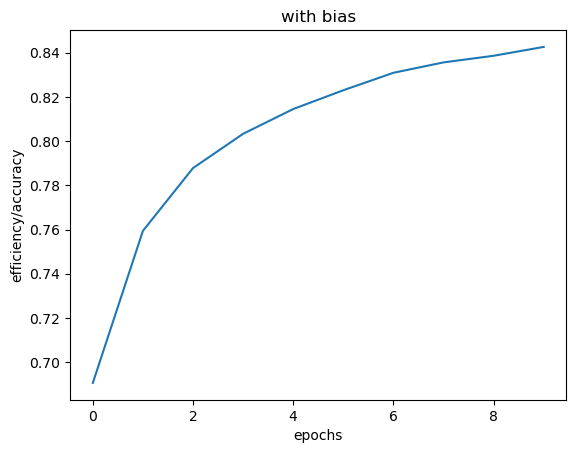

In [6]:
nnwb.train(training_data_list, test_data_list, epoch_count)
plt.title('with bias')
plt.ylabel('efficiency/accuracy')
plt.xlabel('epochs')
plt.plot(nnwb.epochs, nnwb.efficiency)
maxima = np.argmax(np.array(nnwb.efficiency))
print(f'max accuracy is {nnwb.efficiency[maxima]} at {maxima} epoch' )

max accuracy is 0.8137 at 9 epoch


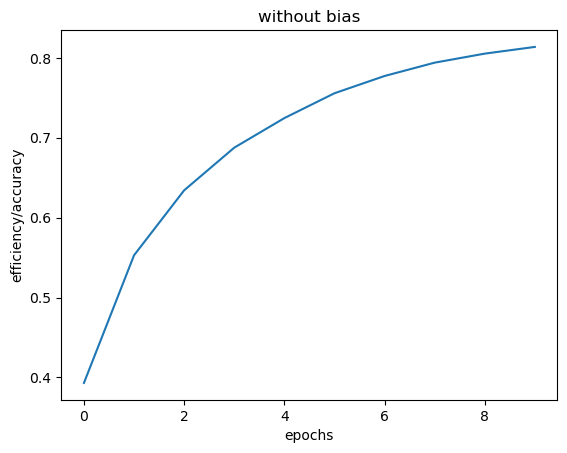

In [7]:
simple_nn.train(training_data_list, test_data_list, epoch_count)
plt.title('without bias')
plt.ylabel('efficiency/accuracy')
plt.xlabel('epochs')
plt.plot(simple_nn.epochs, simple_nn.efficiency)
maxima = np.argmax(np.array(simple_nn.efficiency))
print(f'max accuracy is {simple_nn.efficiency[maxima]} at {maxima} epoch' )

In [8]:
test_data_file = open('mnist_test_10.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    print(correct_label, 'true marker')
    
    inputs = (np.asfarray(all_values[1:]) / 255.0 ) 
    outputs = nnwb.query(inputs)
    label = np.argmax(outputs)
    print(label, 'response NN')
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)
    print('**********')

print(scorecard)

scorecard_array = np.asarray(scorecard)
print('effieciency = ', scorecard_array.sum()/ scorecard_array.size)

7 true marker
7 response NN
**********
2 true marker
6 response NN
**********
1 true marker
1 response NN
**********
0 true marker
0 response NN
**********
4 true marker
4 response NN
**********
1 true marker
1 response NN
**********
4 true marker
4 response NN
**********
9 true marker
9 response NN
**********
5 true marker
2 response NN
**********
9 true marker
7 response NN
**********
[1, 0, 1, 1, 1, 1, 1, 1, 0, 0]
effieciency =  0.7
